In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, SimpleRNN,Dropout,BatchNormalization
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential

from keras.optimizers import Adam

# For evaluation
from sklearn.metrics import mean_squared_error


In [2]:

train_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_set = train_data['Open'].values.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)


X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])  # last 60
    y_train.append(training_set_scaled[i, 0])       # next value

X_train = np.array(X_train)
y_train = np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [3]:
model = Sequential()


model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))  # Reduced dropout


model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))


model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))


model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dropout(0.1))


model.add(Dense(units=1))


optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse')

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.2551
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1424
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1135
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1159
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0968
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0682
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0543
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0511
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0378
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0396
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0304
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0327
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0265
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0247
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - lo

In [5]:

test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_data['Open'].values.reshape(-1, 1)


total_data = pd.concat((train_data['Open'], test_data['Open']), axis=0)
inputs = total_data[len(total_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

X_test = []

for i in range(60, 60 + len(test_data)):
    X_test.append(inputs_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


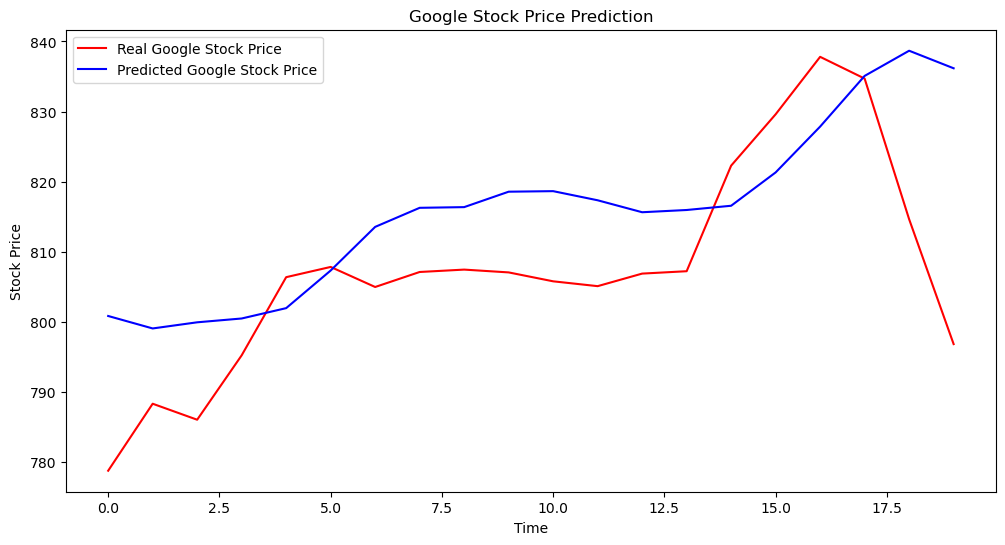

In [6]:

predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [7]:
mse = mean_squared_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 200.086888482945
Root Mean Squared Error: 14.145207261929569
